<a href="https://colab.research.google.com/github/AnyaAP/ComputerGraphics/blob/main/Light.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

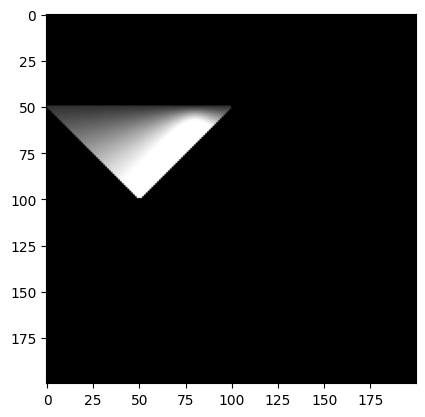

In [7]:
from PIL import Image
import math
import numpy as np
import matplotlib.pyplot as plt

class Point:
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z

class Face:
  def __init__(self, A, B, C):
    self.A = A
    self.B = B
    self.C = C

class Plane:
  def __init__(self, ABC):
    self.A = (ABC.B.y - ABC.A.y) * (ABC.C.z- ABC.A.z) - (ABC.C.y - ABC.A.y) * (ABC.B.z - ABC.A.z)
    self.B = -1*((ABC.B.x - ABC.A.x) * (ABC.C.z - ABC.A.z) - (ABC.C.x - ABC.A.x) * (ABC.B.z - ABC.A.z))
    self.C = (ABC.B.x - ABC.A.x) * (ABC.C.y - ABC.A.y) - (ABC.C.x - ABC.A.x) * (ABC.B.y - ABC.A.y)
    self.D = -1 * ABC.A.x * self.A + ABC.A.y * self.B - ABC.A.z * self.C

def scProduct(V1, V2):
  return V1[0]*V2[0] + V1[1]*V2[1]

def isIn(ABC, x, y):
  AB = (ABC.B.x - ABC.A.x, ABC.B.y - ABC.A.y)
  BC = (ABC.C.x - ABC.B.x, ABC.C.y - ABC.B.y)
  CA = (ABC.A.x - ABC.C.x, ABC.A.y - ABC.C.y)

  Nab = (-AB[1], AB[0])
  Nbc = (-BC[1], BC[0])
  Nca = (-CA[1], CA[0])

  Ap = (x - ABC.A.x, y - ABC.A.y)
  Bp = (x - ABC.B.x, y - ABC.B.y)
  Cp = (x - ABC.C.x, y - ABC.C.y)

  if scProduct(Nab, Ap) <=0 and scProduct(Nbc, Bp) <= 0 and scProduct(Nca, Cp) <= 0:
    return True
  return False

def get3DNormal(ABC):
  return ((ABC.B.y - ABC.A.y) * (ABC.C.z - ABC.A.z) - (ABC.C.y - ABC.A.y) * (ABC.B.z - ABC.A.z),
          -1*((ABC.B.x - ABC.A.x) * (ABC.C.z - ABC.A.z) - (ABC.C.x - ABC.A.x) * (ABC.B.z - ABC.A.z)),
          (ABC.B.x - ABC.A.x) * (ABC.C.y - ABC.A.y) - (ABC.C.x - ABC.A.x) * (ABC.B.y - ABC.A.y))

def get3DPoint(plane, x, y):
  if not plane.C == 0:
    z = (-1 * plane.D - x * plane.A - y * plane.B) / plane.C
    return Point(x, y, z)
  else: return Point(x, y, np.nan)

def getVlen(V):
  return math.sqrt(V[0]*V[0] + V[1]*V[1] + V[2]*V[2])

def getI(ABC, L, x, y):
  plane = Plane(ABC)
  N = (plane.A, plane.B, plane.C)
  #N = get3DNormal(ABC)
  P = get3DPoint(plane, x, y)
  LP = (P.x - L.x, P.y - L.y, P.z - L.z)
  Nlen = getVlen(N)
  LPlen = getVlen(LP)

  return scProduct(N, LP)/Nlen/LPlen

def drawTri(ABC, L, w, h,const, kl=1):
  for i in range(h):
    for j in range(w):
      if isIn(ABC, j, i):
        il = kl * int(round(getI(f, L, j, i) * 255))
        img.putpixel((j, i), (il+const, il+const, il+const))


A = Point(0,50,10)
B = Point(50, 100, 30)
C = Point(100, 50, 10)

A1 = Point(170, 170, 0)

L = Point(80, 50, 60)

f = Face(A, B, C)
f1 = Face(B, A1, C)
img = Image.new('RGB', (200,200))

drawTri(f, L, 100, 100, 50, 3)


plt.imshow(img)
